In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# filter warnings that can be ignored
import warnings
warnings.filterwarnings('ignore')


In [3]:
df_dataIndia = pd.read_csv('data.csv', encoding = 'cp1252', low_memory = False)

In [4]:
df_dataIndia.head()

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,1990-02-01
1,151,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,1990-02-01
2,152,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,1990-02-01
3,150,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,1990-03-01
4,151,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,1990-03-01


In [5]:
df_dataIndia.shape

(435742, 13)

In [6]:
df_dataIndia.isnull().sum()

stn_code                       144077
sampling_date                       3
state                               0
location                            3
agency                         149481
type                             5393
so2                             34646
no2                             16233
rspm                            40222
spm                            237387
location_monitoring_station     27491
pm2_5                          426428
date                                7
dtype: int64

In [7]:
df_dataIndia.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
stn_code                       291665 non-null object
sampling_date                  435739 non-null object
state                          435742 non-null object
location                       435739 non-null object
agency                         286261 non-null object
type                           430349 non-null object
so2                            401096 non-null float64
no2                            419509 non-null float64
rspm                           395520 non-null float64
spm                            198355 non-null float64
location_monitoring_station    408251 non-null object
pm2_5                          9314 non-null float64
date                           435735 non-null object
dtypes: float64(5), object(8)
memory usage: 43.2+ MB


In [8]:
df_dataIndia.count()

stn_code                       291665
sampling_date                  435739
state                          435742
location                       435739
agency                         286261
type                           430349
so2                            401096
no2                            419509
rspm                           395520
spm                            198355
location_monitoring_station    408251
pm2_5                            9314
date                           435735
dtype: int64

In [10]:
df_dataIndia.drop(['stn_code', 'sampling_date', 'agency', 'location_monitoring_station'], axis = 1, inplace = True)

In [11]:
df_dataIndia = df_dataIndia.dropna(subset = ['date'])

In [12]:
df_dataIndia.columns

Index(['state', 'location', 'type', 'so2', 'no2', 'rspm', 'spm', 'pm2_5',
       'date'],
      dtype='object')

In [14]:
types = {
    "Residential": "R",
    "Residential and others": "RO",
    "Residential, Rural and other Areas": "RRO",
    "Industrial Area": "I",
    "Industrial Areas": "I",
    "Industrial": "I",
    "Sensitive Area": "S",
    "Sensitive Areas": "S",
    "Sensitive": "S",
    np.nan : 'RRO'
}
df_dataIndia.type = df_dataIndia.type.replace(types)

In [15]:
df_dataIndia.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [16]:
df_dataIndia['date'] = pd.to_datetime(df_dataIndia['date'], errors = 'coerce')

df_dataIndia.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01


In [17]:
df_dataIndia['year'] = df_dataIndia.date.dt.year

df_dataIndia.head(5)

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
0,Andhra Pradesh,Hyderabad,RRO,4.8,17.4,NaN,NaN,NaN,1990-02-01,1990
1,Andhra Pradesh,Hyderabad,I,3.1,7.0,NaN,NaN,NaN,1990-02-01,1990
2,Andhra Pradesh,Hyderabad,RRO,6.2,28.5,NaN,NaN,NaN,1990-02-01,1990
3,Andhra Pradesh,Hyderabad,RRO,6.3,14.7,NaN,NaN,NaN,1990-03-01,1990
4,Andhra Pradesh,Hyderabad,I,4.7,7.5,NaN,NaN,NaN,1990-03-01,1990


In [18]:
colunas = ['so2', 'no2', 'rspm', 'spm', 'pm2_5']

In [19]:
from sklearn.preprocessing import Imputer
#chamando o Imputer para preencher os valores faltantes com a média de cada coluna
imputer = Imputer(missing_values=np.nan, strategy='mean')
df_dataIndia[colunas] = imputer.fit_transform(df_dataIndia[colunas])

C:\Users\Srivatsan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
df_dataIndia.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435735 entries, 0 to 435738
Data columns (total 10 columns):
state       435735 non-null object
location    435735 non-null object
type        435735 non-null object
so2         435735 non-null float64
no2         435735 non-null float64
rspm        435735 non-null float64
spm         435735 non-null float64
pm2_5       435735 non-null float64
date        435735 non-null datetime64[ns]
year        435735 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(1), object(3)
memory usage: 36.6+ MB


In [21]:
print(df_dataIndia.isnull().sum())

state       0
location    0
type        0
so2         0
no2         0
rspm        0
spm         0
pm2_5       0
date        0
year        0
dtype: int64


In [22]:
statewise_so2 = df_dataIndia[['so2','state']].groupby('state', as_index=False).median().sort_values(by='so2')
statewise_so2.head(10)

,state,so2
22,Nagaland,2.0
21,Mizoram,2.0
20,Meghalaya,2.0
1,Arunachal Pradesh,2.5
12,Himachal Pradesh,3.0
16,Kerala,4.2
29,Telangana,5.0
23,Odisha,5.0
13,Jammu & Kashmir,5.0
0,Andhra Pradesh,5.0


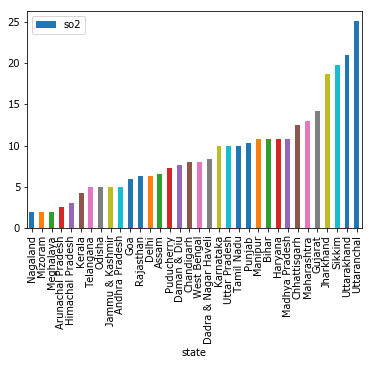

In [23]:
statewise_so2.plot(kind='bar',x='state',y='so2')

In [24]:
statewise_no2 = df_dataIndia[['no2','state']].groupby('state', as_index=False).median().sort_values(by='no2')
statewise_no2.head(10)

,state,no2
1,Arunachal Pradesh,5.0
21,Mizoram,5.0
22,Nagaland,7.0
20,Meghalaya,10.0
9,Goa,11.6
24,Puducherry,13.0
13,Jammu & Kashmir,13.0
12,Himachal Pradesh,13.9
16,Kerala,14.0
2,Assam,14.0


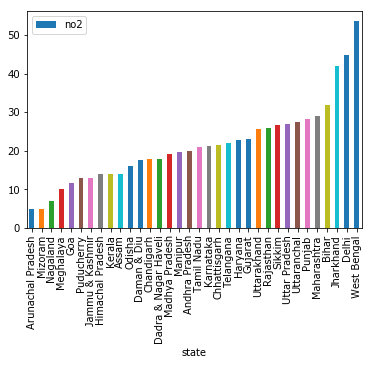

In [25]:
statewise_no2.plot(kind='bar',x='state',y='no2')

In [26]:
state_wise_rspm = df_dataIndia[['rspm','state']].groupby('state', as_index=False).median().sort_values(by='rspm')
state_wise_rspm.head(5)

,state,rspm
27,Sikkim,32.0
21,Mizoram,40.0
24,Puducherry,46.0
16,Kerala,49.0
9,Goa,56.0


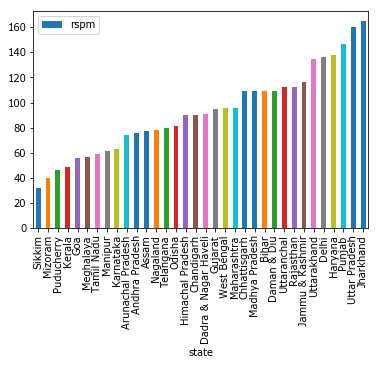

In [27]:
state_wise_rspm.plot(kind='bar',x='state',y='rspm')

In [28]:
state_wise_spm = df_dataIndia[['spm','state']].groupby('state', as_index=False).median().sort_values(by='spm')
state_wise_spm.head(5)

,state,spm
27,Sikkim,75.0
19,Manipur,120.5
24,Puducherry,191.0
9,Goa,199.0
7,Daman & Diu,200.5


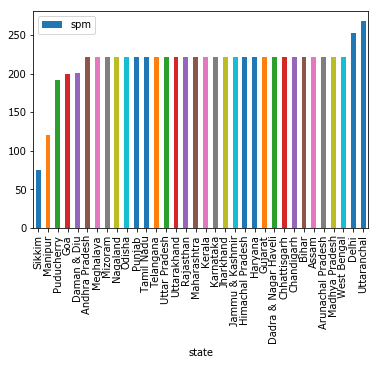

In [29]:
state_wise_spm.plot(kind='bar',x='state',y='spm')

In [30]:
andhra = df_dataIndia[df_dataIndia['state'] == 'Andhra Pradesh']

year_wise_AP = andhra[['so2','no2','rspm','spm','year']].groupby('year').median()
year_wise_AP.head()

,so2,no2,rspm,spm
year,,,,
1990,5.60,13.6,108.833091,179.00000
1991,8.25,12.8,108.833091,141.50000
1992,12.40,27.6,108.833091,192.00000
1993,6.00,11.4,108.833091,220.78348
1994,8.70,14.2,108.833091,220.78348


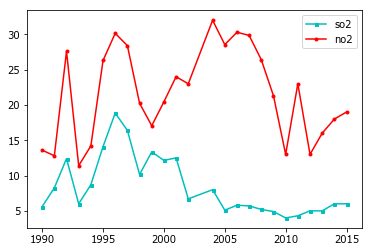

In [31]:
plt.plot(year_wise_AP['so2'],'-sc',markersize = 3)
plt.plot(year_wise_AP['no2'],'-or', markersize = 3)
plt.legend()


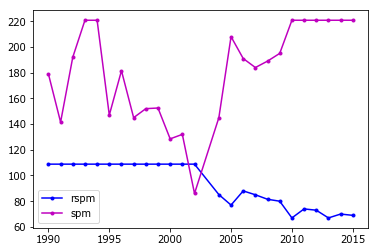

In [32]:
plt.plot(year_wise_AP['rspm'],'-ob',markersize = 3)
plt.plot(year_wise_AP['spm'],'-om', markersize = 3)
plt.legend()

In [40]:
df_dataIndia.to_csv('moke.csv')